Filtro de Kalman
==

$s(n)=as(n-1)+u(n)$ 

$s(n)$=realizacion del proceso Gauss-Marcov

$u(n)$=Ruido

$a$=constante del proceso <br>


In [55]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


Generar una realizacion del proceso aleatorio 

Un modelo Gauss-Marcov

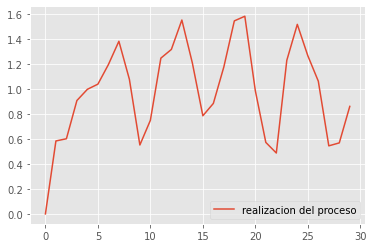

In [62]:
N=30 #tamano de la senal'
a=0.5#valor de la constante del porceso
sigma_u=1 #varianza del proceso

s=np.zeros(N) #inicializar la senal
for n in np.arange(1,N):
  s[n]=a*s[n-1]+np.random.rand(1)*sigma_u
    
plt.plot(s,label='realizacion del proceso')
plt.legend()
plt.show()



Generar la senal con ruido a partir de la realizacion

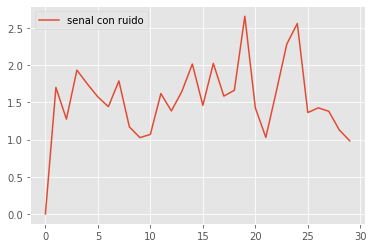

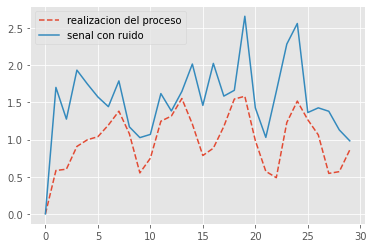

El error: 0.44016447890531674


In [63]:
sigma_n=1.2
sr=np.zeros(N);
#agregar ruido
for n in np.arange(1,N):
  sr[n]=s[n]++np.random.rand(1)*sigma_n

#senal con ruido
plt.plot(sr,label='senal con ruido')
plt.legend()
plt.show()

#calsularel MSE entre la senal co ruido y la original
error=((sr-s)**2).mean()


plt.plot(s,'--',label='realizacion del proceso')    
plt.plot(sr,label='senal con ruido')
plt.legend()
plt.show()
print('El error:',error)

Costruir el filtro de Kalman

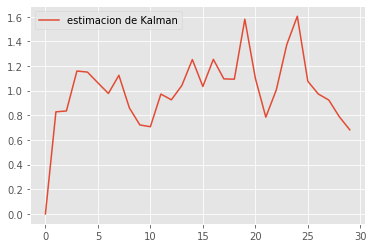

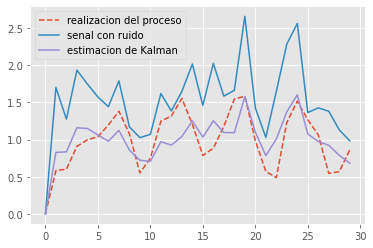

Error de Kalman 0.06396159168988458


In [64]:
s_pred=0
M=0
s_hat=np.zeros(N)

for n in np.arange(N):
  #prediccion  
  s_pred=a*s_pred
  errorR=sr[n]-s_pred
  #calcular la prediccion de minimo MSE
  M=a**2*M+sigma_u
  #calcular la ganacia de Kalman
  K=M/(sigma_n+M)
  #calcula el esimador en base a la correccion de prediccion
  s_pred=s_pred+K*errorR
  s_hat[n]=s_pred
  #actualizar la minima MSE
  M=(1-K)*M  

#calcular el MSE de la estimacion
ErrorK=((s_hat-s)**2).mean()
plt.plot(s_hat,label='estimacion de Kalman')
plt.legend()
plt.show()

plt.plot(s,'--',label='realizacion del proceso')
plt.plot(sr,label='senal con ruido')
plt.plot(s_hat,label='estimacion de Kalman')
plt.legend()
plt.show()
print('Error de Kalman',ErrorK)

